# A study into the lyrics of Tom Waits

## 1. Aims, objectives and background 

### 1.1 Introduction
Natural Language Processing is a subset of artificial intelligence devoted to the analysis of language. The author is aiming to use NLP to analyse the body of work of Tom Waits.

In this study we will try to scrape the lyrics of Tom Waits songs from his official website and then apply various techniques to study them.

The purpose is to create a process which will allow us to get a good understanding of the themes and moods in an artist's work.

### 1.2 Aims and Objectives
The main objective is to explain the process with which we will get a good understanding of the themes and moods in the artist's body of work.

### 1.3 Data
The data required for this study will be scraped by the official Tom Waits website: http://www.tomwaits.com/songs/

### 1.4 Legal Considerations
The website we are using does not include a clause against Webscraping. In Clause 4 Ownership it is expressly stated that: "[...] you have a licence to download, access view, use and display this Site and the Materials [...]"  Reference: [tomwaits.com T&C](http://www.tomwaits.com/terms/)

### 1.5 Who Is Tom Waits
Thomas Alan Waits (born December 7, 1949) is an American musician, composer, songwriter and actor. His lyrics often focus on the underbelly of society and are delivered in his trademark deep, gravelly voice. He worked primarily in jazz during the 1970s, but his music since the 1980s has reflected greater influence from blues, rock, vaudeville, and experimental genres. Source: [Wikipedia - Tom Waits](https://en.wikipedia.org/wiki/Tom_Waits)

### 1.6 Libraries used

In [46]:
import requests
import csv
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

# BeautifulSoup
try:
    from bs4 import BeautifulSoup
except:
    !pip install beautifulsoup4
    from bs4 import BeautifulSoup 

# WordCloud
try:
    from wordcloud import WordCloud
except:
    !pip install wordcloud
    from wordcloud import WordCloud 

# VADER
try:
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
except:
    !pip install vaderSentiment
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

# text2emotion
try:
    import text2emotion as te
except:
    !pip install text2emotion
    import text2emotion as te

---

## 2. Webscraping
Initially we navigated to the web page of Tom Waits and tried to locate the lyrics of the songs in the HTML files. After some searching we made following observations:
1. The song lyrics are saved in the form: "/songs/song/[Song Number]/[Song Title]/"
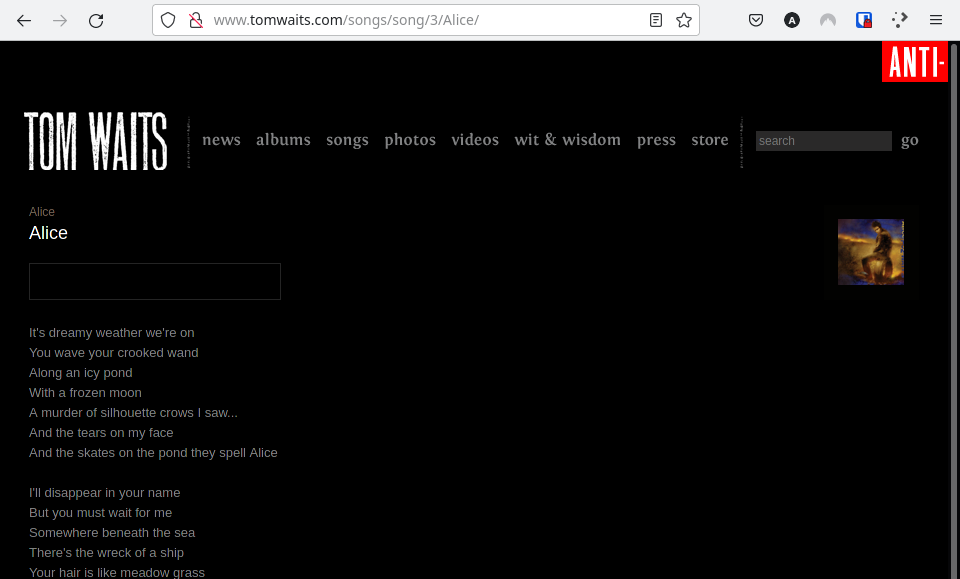

2. A simplified version of the above link (http://www.tomwaits.com/songs/song/[Song Number]) redirects to the link including the song title.
3. The song numbers are serial from 1 to 374
4. The song lyrics are inside a <div> with class "songs-lyrics"
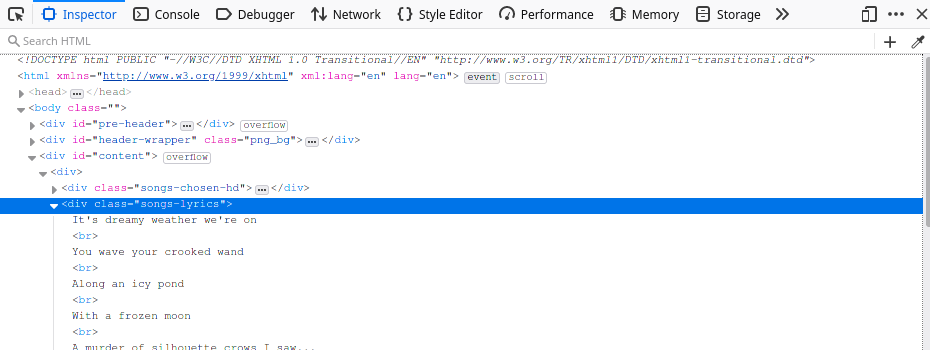

With this information in hand we were ready to start scrapping.

We used the [Requests](https://docs.python-requests.org) library to request the html files from the website and [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to parse the HTML.

Last but not least, we used [word_tokenize](https://www.nltk.org/api/nltk.tokenize.html) package from NLTK to transform our downloaded data into word tokens and the python [CSV](https://docs.python.org/3/library/csv.html) module to save everything into a .csv file which we called "tokens.csv"

In [2]:
# First we create an empty python list for the tokens
tokens = []

for i in range(1,374):
    # request a resource from a specific URL.
    r  = requests.get("http://www.tomwaits.com/songs/song/" + str(i))
    # put the text that is returned in the response in a variable
    data = r.text
    # parse the raw HTML into a `soup' object
    soup = BeautifulSoup(data, "html.parser")
    # filter lyrics by class
    lyricsClass = soup.find("div", {"class": "songs-lyrics"})
    # filter contents in a string
    lyricsStr = str(lyricsClass.contents)
    # tokenize song
    tokensSong = word_tokenize(lyricsStr)
    # append to tokens list
    for t in tokensSong:
        tokens.append(t)

# write the tokens in a csv file
with open("tokens.csv", "w") as t:
    writer = csv.writer(t)
    writer.writerows(tokens)

---

## 3. Data cleaning and processing
NB: If you already ran the webscrapping part of the process there is already a list created called tokens containing the lyrics words. For clarity's sake we will recreate the list below from the provided .csv file using the CSV module of python

In [10]:
with open('tokens.csv', newline='') as f:
    reader = csv.reader(f)
    tokens = list(tokens)

tokens

['[',
 "'\\n",
 "'",
 ']',
 '[',
 "'\\n",
 "'",
 ']',
 '[',
 '``',
 '\\n',
 'It',
 "'s",
 'dreamy',
 'weather',
 'we',
 "'re",
 'on',
 "''",
 ',',
 '<',
 'br/',
 '>',
 ',',
 "'\\r\\nYou",
 'wave',
 'your',
 'crooked',
 'wand',
 "'",
 ',',
 '<',
 'br/',
 '>',
 ',',
 "'\\r\\nAlong",
 'an',
 'icy',
 'pond',
 "'",
 ',',
 '<',
 'br/',
 '>',
 ',',
 "'\\r\\nWith",
 'a',
 'frozen',
 'moon',
 "'",
 ',',
 '<',
 'br/',
 '>',
 ',',
 "'\\r\\nA",
 'murder',
 'of',
 'silhouette',
 'crows',
 'I',
 'saw',
 '...',
 "'",
 ',',
 '<',
 'br/',
 '>',
 ',',
 "'\\r\\nAnd",
 'the',
 'tears',
 'on',
 'my',
 'face',
 "'",
 ',',
 '<',
 'br/',
 '>',
 ',',
 "'\\r\\nAnd",
 'the',
 'skates',
 'on',
 'the',
 'pond',
 'they',
 'spell',
 'Alice',
 "'",
 ',',
 '<',
 'br/',
 '>',
 ',',
 "'\\n",
 "'",
 ',',
 '<',
 'br/',
 '>',
 ',',
 '``',
 '\\r\\nI',
 "'ll",
 'disappear',
 'in',
 'your',
 'name',
 "''",
 ',',
 '<',
 'br/',
 '>',
 ',',
 "'\\r\\nBut",
 'you',
 'must',
 'wait',
 'for',
 'me',
 "'",
 ',',
 '<',
 'br/',
 '>',
 

At this point we have got a csv file containing the tokens but it also contains "\n" return values, html elements of line breaks and more data that are of no use to us.

We will proceed to clean our data initially removing characters that are not alphabetical using the build in [isAlpha()](https://docs.python.org/3/library/stdtypes.html?highlight=isalpha) method of Python.

Since we are also going to be working with NLP we will also remove most common words, articles, pronouns and so on called stopwords. To this we will again use the ready made stopwords method from [NLTK](https://www.nltk.org)

In an effort to further optimise our dataset, we will experiment with stemming versus lemmatization by trying out [PorterStemmer](https://www.nltk.org/api/nltk.stem.porter.html?highlight=porterstemmer#nltk.stem.porter.PorterStemmer), [LancasterStemmer](https://www.nltk.org/api/nltk.stem.lancaster.html?highlight=lancasterstemmer) as well as [WordNetLemmatizer](https://www.nltk.org/api/nltk.stem.wordnet.html?highlight=wordnetlemmatizer#nltk.stem.wordnet.WordNetLemmatizer) from the NLTK.stem library and we will create three separate [wordclouds](https://github.com/amueller/word_cloud) to visually see the differences and decide which one is the best fit for our dataset.

In order to plot the Wordclouds we will use [Pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) from Matplotlib

In [11]:
# First we clean the tokens list and only keep the alphabetical values 
# by copying them to a newly created list
cleaned_tokens = []
for t in tokens:
    if t.isalpha():
        cleaned_tokens.append(t)

cleaned_tokens

['It',
 'dreamy',
 'weather',
 'we',
 'on',
 'wave',
 'your',
 'crooked',
 'wand',
 'an',
 'icy',
 'pond',
 'a',
 'frozen',
 'moon',
 'murder',
 'of',
 'silhouette',
 'crows',
 'I',
 'saw',
 'the',
 'tears',
 'on',
 'my',
 'face',
 'the',
 'skates',
 'on',
 'the',
 'pond',
 'they',
 'spell',
 'Alice',
 'disappear',
 'in',
 'your',
 'name',
 'you',
 'must',
 'wait',
 'for',
 'me',
 'beneath',
 'the',
 'sea',
 'the',
 'wreck',
 'of',
 'a',
 'ship',
 'hair',
 'is',
 'like',
 'meadow',
 'grass',
 'the',
 'tide',
 'And',
 'the',
 'raindrops',
 'on',
 'my',
 'window',
 'the',
 'ice',
 'in',
 'my',
 'drink',
 'all',
 'that',
 'I',
 'can',
 'think',
 'of',
 'Is',
 'Alice',
 'Arithmetock',
 'I',
 'turn',
 'the',
 'hands',
 'back',
 'on',
 'the',
 'clock',
 'does',
 'the',
 'ocean',
 'rock',
 'the',
 'boat',
 'did',
 'the',
 'razor',
 'find',
 'my',
 'throat',
 'only',
 'strings',
 'that',
 'hold',
 'me',
 'here',
 'tangled',
 'up',
 'around',
 'the',
 'pier',
 'so',
 'a',
 'secret',
 'kiss',
 '

In [17]:
# Following this we will remove the stopwords again by copying the words
# that are not stopwords to a new list

stop_words = stopwords.words('english')
stopwords_removed_tokens = []
for t in cleaned_tokens:
    if not t in stop_words:
        stopwords_removed_tokens.append(t)

stopwords_removed_tokens

['It',
 'dreamy',
 'weather',
 'wave',
 'crooked',
 'wand',
 'icy',
 'pond',
 'frozen',
 'moon',
 'murder',
 'silhouette',
 'crows',
 'I',
 'saw',
 'tears',
 'face',
 'skates',
 'pond',
 'spell',
 'Alice',
 'disappear',
 'name',
 'must',
 'wait',
 'beneath',
 'sea',
 'wreck',
 'ship',
 'hair',
 'like',
 'meadow',
 'grass',
 'tide',
 'And',
 'raindrops',
 'window',
 'ice',
 'drink',
 'I',
 'think',
 'Is',
 'Alice',
 'Arithmetock',
 'I',
 'turn',
 'hands',
 'back',
 'clock',
 'ocean',
 'rock',
 'boat',
 'razor',
 'find',
 'throat',
 'strings',
 'hold',
 'tangled',
 'around',
 'pier',
 'secret',
 'kiss',
 'madness',
 'bliss',
 'I',
 'think',
 'I',
 'dead',
 'grave',
 'adrift',
 'I',
 'lost',
 'I',
 'must',
 'insane',
 'go',
 'skating',
 'name',
 'tracing',
 'twice',
 'fell',
 'ice',
 'Of',
 'Alice',
 'Everything',
 'think',
 'true',
 'ocean',
 'blue',
 'lost',
 'flood',
 'red',
 'blood',
 'skeleton',
 'crew',
 'think',
 'true',
 'dish',
 'ran',
 'away',
 'spoon',
 'deep',
 'heart',
 'litt

In [22]:
# Create tokens with Porter Stemmer
ps = PorterStemmer()
porter_tokens = []
for t in stopwords_removed_tokens:
    cleaned = ps.stem(t)
    porter_tokens.append(cleaned)

porter_tokens

['it',
 'dreami',
 'weather',
 'wave',
 'crook',
 'wand',
 'ici',
 'pond',
 'frozen',
 'moon',
 'murder',
 'silhouett',
 'crow',
 'i',
 'saw',
 'tear',
 'face',
 'skate',
 'pond',
 'spell',
 'alic',
 'disappear',
 'name',
 'must',
 'wait',
 'beneath',
 'sea',
 'wreck',
 'ship',
 'hair',
 'like',
 'meadow',
 'grass',
 'tide',
 'and',
 'raindrop',
 'window',
 'ice',
 'drink',
 'i',
 'think',
 'is',
 'alic',
 'arithmetock',
 'i',
 'turn',
 'hand',
 'back',
 'clock',
 'ocean',
 'rock',
 'boat',
 'razor',
 'find',
 'throat',
 'string',
 'hold',
 'tangl',
 'around',
 'pier',
 'secret',
 'kiss',
 'mad',
 'bliss',
 'i',
 'think',
 'i',
 'dead',
 'grave',
 'adrift',
 'i',
 'lost',
 'i',
 'must',
 'insan',
 'go',
 'skate',
 'name',
 'trace',
 'twice',
 'fell',
 'ice',
 'of',
 'alic',
 'everyth',
 'think',
 'true',
 'ocean',
 'blue',
 'lost',
 'flood',
 'red',
 'blood',
 'skeleton',
 'crew',
 'think',
 'true',
 'dish',
 'ran',
 'away',
 'spoon',
 'deep',
 'heart',
 'littl',
 'red',
 'glow',
 'dec

In [23]:
# Create tokens with Lancaster Stemmer
ls = LancasterStemmer()
lancaster_tokens = []
for t in stopwords_removed_tokens:
    cleaned = ls.stem(t)
    lancaster_tokens.append(cleaned)
    
lancaster_tokens

['it',
 'dreamy',
 'weath',
 'wav',
 'crook',
 'wand',
 'icy',
 'pond',
 'froz',
 'moon',
 'murd',
 'silhouet',
 'crow',
 'i',
 'saw',
 'tear',
 'fac',
 'skat',
 'pond',
 'spel',
 'al',
 'disappear',
 'nam',
 'must',
 'wait',
 'benea',
 'sea',
 'wreck',
 'ship',
 'hair',
 'lik',
 'meadow',
 'grass',
 'tid',
 'and',
 'raindrop',
 'window',
 'ic',
 'drink',
 'i',
 'think',
 'is',
 'al',
 'arithmetock',
 'i',
 'turn',
 'hand',
 'back',
 'clock',
 'oc',
 'rock',
 'boat',
 'raz',
 'find',
 'throat',
 'strings',
 'hold',
 'tangl',
 'around',
 'pier',
 'secret',
 'kiss',
 'mad',
 'bliss',
 'i',
 'think',
 'i',
 'dead',
 'grav',
 'adrift',
 'i',
 'lost',
 'i',
 'must',
 'ins',
 'go',
 'skat',
 'nam',
 'trac',
 'twic',
 'fel',
 'ic',
 'of',
 'al',
 'everyth',
 'think',
 'tru',
 'oc',
 'blu',
 'lost',
 'flood',
 'red',
 'blood',
 'skeleton',
 'crew',
 'think',
 'tru',
 'dish',
 'ran',
 'away',
 'spoon',
 'deep',
 'heart',
 'littl',
 'red',
 'glow',
 'decompos',
 'go',
 'think',
 'tru',
 'fish',


In [25]:
# Create Lemmatization tokens
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = []
for t in stopwords_removed_tokens:
    cleaned = lemmatizer.lemmatize(t)
    lemmatized_tokens.append(cleaned)

lemmatized_tokens

['It',
 'dreamy',
 'weather',
 'wave',
 'crooked',
 'wand',
 'icy',
 'pond',
 'frozen',
 'moon',
 'murder',
 'silhouette',
 'crow',
 'I',
 'saw',
 'tear',
 'face',
 'skate',
 'pond',
 'spell',
 'Alice',
 'disappear',
 'name',
 'must',
 'wait',
 'beneath',
 'sea',
 'wreck',
 'ship',
 'hair',
 'like',
 'meadow',
 'grass',
 'tide',
 'And',
 'raindrop',
 'window',
 'ice',
 'drink',
 'I',
 'think',
 'Is',
 'Alice',
 'Arithmetock',
 'I',
 'turn',
 'hand',
 'back',
 'clock',
 'ocean',
 'rock',
 'boat',
 'razor',
 'find',
 'throat',
 'string',
 'hold',
 'tangled',
 'around',
 'pier',
 'secret',
 'kiss',
 'madness',
 'bliss',
 'I',
 'think',
 'I',
 'dead',
 'grave',
 'adrift',
 'I',
 'lost',
 'I',
 'must',
 'insane',
 'go',
 'skating',
 'name',
 'tracing',
 'twice',
 'fell',
 'ice',
 'Of',
 'Alice',
 'Everything',
 'think',
 'true',
 'ocean',
 'blue',
 'lost',
 'flood',
 'red',
 'blood',
 'skeleton',
 'crew',
 'think',
 'true',
 'dish',
 'ran',
 'away',
 'spoon',
 'deep',
 'heart',
 'little',
 

##### Porter Tokens Wordcloud

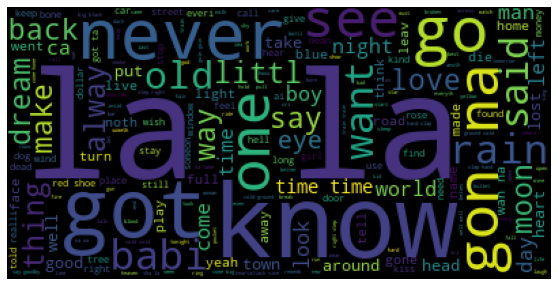

In [34]:
# Create a pandas dataframe porter tokens
df_porter = pd.DataFrame(porter_tokens, columns=["Words"])

# Join the tokens / words to create a body of text in the form of a string
wordcloudStringPS = ' '.join(df_porter['Words'])

# Generate Wordcloud
wordcloud = WordCloud(background_color='black').generate(wordcloudStringPS)

# Set wordcloud dimensions, margin show, remove axes and show using 
plt.figure( figsize=(10,5) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

##### Lancaster Tokens Wordcloud

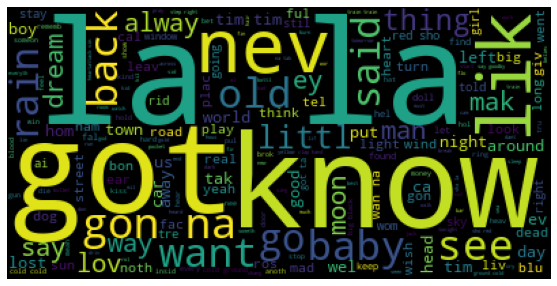

In [35]:
df_lancaster = pd.DataFrame(lancaster_tokens, columns=["Words"])

wordcloudStringLS = ' '.join(df_lancaster['Words'])

wordcloud = WordCloud(background_color='black').generate(wordcloudStringLS)
plt.figure( figsize=(10,5) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

##### Lemmatization Wordcloud

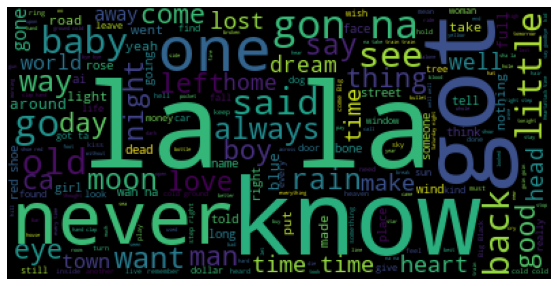

In [36]:
df_lemma = pd.DataFrame(lemmatized_tokens, columns=["Words"])

wordcloudStringL = ' '.join(df_lemma['Words'])

wordcloud = WordCloud(background_color='black').generate(wordcloudStringL)
plt.figure( figsize=(10,5) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Result
From observing the result of the word lists as well as wordclouds we see that the Lancaster Stemmer does not necessarily produce words contained in a Thesaurus and thus humanly understandable and that the Porter Stemmer has an edge over word lemmatization. We will use the porter tokens for further analysis.

---

## 4. Sentiment analysis
There are many ways to perform sentiment analysis on a corpus of text. 
From the Porter Stemmer words we will now use the Valence Aware Dictionary and sEntiment Reasoner ([VADER](https://pypi.org/project/vaderSentiment/)) to perform a sentiment analysis and see how positive are the lyrics of Tom Waits.

As a next step we will also use the [text2emotion](https://pypi.org/project/text2emotion/) package to see what kind of emotion does these lyrics provoke.

##### VADER

[Source of function](https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/)

In [45]:
# function to print sentiments of the sentence.
def sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
     
    print("Overall sentiment dictionary is : ", sentiment_dict)
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
 
    print("Sentence Overall Rated As", end = " ")
 
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        print("Positive")
 
    elif sentiment_dict['compound'] <= - 0.05 :
        print("Negative")
 
    else :
        print("Neutral")

sentiment_scores(wordcloudStringPS)

Overall sentiment dictionary is :  {'neg': 0.128, 'neu': 0.705, 'pos': 0.167, 'compound': 1.0}
sentence was rated as  12.8 % Negative
sentence was rated as  70.5 % Neutral
sentence was rated as  16.7 % Positive
Sentence Overall Rated As Positive


##### text2emotion

In [42]:
emotions = te.get_emotion(wordcloudStringPS)

In [43]:
emotions

{'Happy': 0.1, 'Angry': 0.1, 'Surprise': 0.25, 'Sad': 0.28, 'Fear': 0.27}

## 5. Word Frequency Analysis
We will also run a short frequency analysis by passing the Porter Tokens to the NLTK FreqDist method.

Resource used to finetune the filtering: [Source](https://www.pythonprogramming.in/find-frequency-of-each-word-from-a-text-file-using-nltk.html)

abalon: 1
abandon: 3
abba: 2
abdel: 3
abdomen: 1
abel: 2
abil: 1
aboard: 1
abracadabra: 1
abroad: 1
absolut: 1
absorpt: 1
accept: 1
accid: 2
accompani: 1
accord: 1
accordion: 4
account: 3
accoutr: 1
acoust: 1
acquaint: 4
across: 34
action: 3
actual: 8
adam: 1
addendum: 1
addit: 2
address: 1
adelaid: 1
adjust: 1
admir: 3
admit: 3
adrift: 1
advertis: 3
affair: 5
afraid: 9
africa: 1
after: 1
aftermath: 1
afternoon: 3
agre: 1
agreen: 2
ahab: 2
ahead: 13
aimlessli: 1
airplan: 2
airport: 1
aisl: 1
akimbo: 1
alabast: 1
alarm: 3
algebrazi: 1
alibi: 1
alic: 4
aliv: 20
alley: 8
allig: 14
allow: 19
almond: 1
almost: 8
alon: 30
along: 34
alot: 2
alphabet: 2
alreadi: 5
alright: 6
also: 4
altar: 9
although: 1
alvarado: 1
alway: 108
amaz: 2
amber: 1
ambul: 1
amen: 2
amend: 1
america: 1
american: 3
amidst: 2
ammo: 1
amnesia: 1
among: 4
amount: 3
amour: 1
amus: 2
anaconda: 1
anderson: 1
andi: 1
angel: 18
anger: 1
angl: 1
anim: 1
anniversari: 3
annoy: 3
anoth: 57
answer: 8
antenna: 1
anthoni: 2
anton: 4

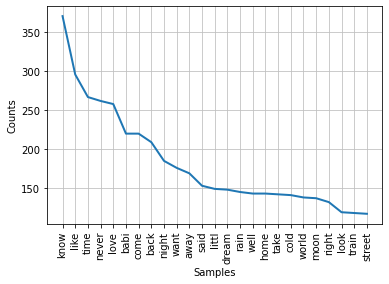

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [53]:
data_analysis = nltk.FreqDist(porter_tokens)

# Let's take the specific words only if their frequency is greater than 3.
filter_words = dict([(m, n) for m, n in data_analysis.items() if len(m) > 3])
 
for key in sorted(filter_words):
    print("%s: %s" % (key, filter_words[key]))
 
data_analysis = nltk.FreqDist(filter_words)
 
data_analysis.plot(25, cumulative=False)

## 6. Summary

A sentiment analysis on the Corpus of Tom Waits shows that he uses notions of Surprise, Sadness and Fear, with a slight tendency towards positive feelings.

The most used themes are around the words: Time, Love, Night, Dream, Rain Home, Cold, World and Train

We could say that listening to his music leaves a bittersweet taste.